# Problem 3

**Graph implementation**

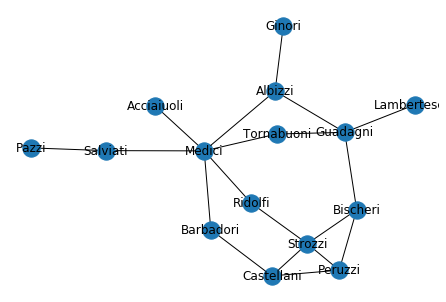

In [5]:
import networkx as nx
import numpy as np

G = nx.florentine_families_graph()
G.remove_edge('Ridolfi', 'Tornabuoni')

n_nodes = len(G)
nx.draw(G,with_labels=True)

## 3 (b)

**Simulate the averaging dynamics with stubborn nodes and deduce the equilibrium state vector**

In [6]:
# Construct a dictionary that maps the label of nodes (from "Acciaiuoli" to "Lamberteschi") to their index (from 0 to n_nodes-1)
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i

# Number of iterations (i.e. the final value of t)
n_iter = 50;
    
# Stubborn and regular nodes
stubborn = ["Medici", "Strozzi"];
stubborn_id = [indices.get(key) for key in stubborn]
regular = [node for node in G.nodes if node not in stubborn]
regular_id = [id for id in range(n_nodes) if id not in stubborn_id]

# Input to stubborn nodes
u = [1,-1]


# P matrix
A = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
A = A.toarray() # convert A to a numpy array
degrees = np.sum(A,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ A

# Submatrices Q and E
Q = P[np.ix_(regular_id, regular_id)]
E = P[np.ix_(regular_id, stubborn_id)]

# Sample a random initial condition for regular nodes (doesn't matter which one, because there are stubborn nodes)
ic = np.random.uniform(0,1,len(regular))

# Set the initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;
print("Initial condition:", x[:,0], "\n")

# Evolve the opinion vector
for t in range(1,n_iter):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1];

# Print the final opinions vector
x_final = x[:,n_iter-1]
print("Equilibrium state vector:")
for key in indices.keys():
    print(key, x_final[indices[key]])

Initial condition: [ 0.51933878  1.          0.58761043  0.23273592 -1.          0.98933672
  0.15493033  0.11515023  0.75079834  0.15335904  0.10372332  0.15784684
  0.53018453  0.61126294  0.30202046] 

Equilibrium state vector:
Acciaiuoli 1.0
Medici 1.0
Castellani -0.45454387960344433
Peruzzi -0.6363619077955383
Strozzi -1.0
Barbadori 0.27272786589268255
Ridolfi 0.0
Tornabuoni 0.6363698417160129
Albizzi 0.6363720957143226
Salviati 0.9999999732888735
Pazzi 0.9999999495362665
Bischeri -0.45454014507399015
Guadagni 0.2727333712249387
Ginori 0.636370008389607
Lamberteschi 0.27273968343202576


**Plot the trajectories of the different states**

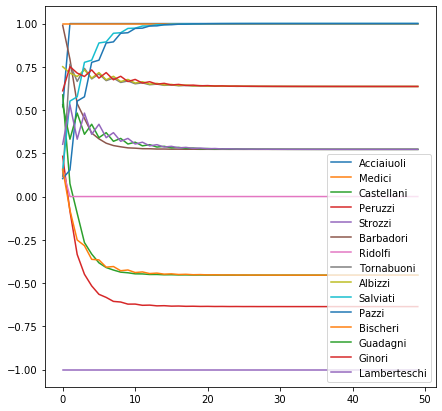

In [7]:
import matplotlib.pyplot as plt
    
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(n_nodes):
    trajectory = x[node,:]
    ax.plot(trajectory, label=f'{list(G.nodes)[node]}')
    
ax.legend()

## 3 (d)

In [10]:
# Bonacich centrality with beta = 0.15 and mu = (1/n,...,1/n) (AKA PageRank centrality)
beta = 0.15
mu = np.ones(n_nodes) / n_nodes # vector mu = (1/n, ..., 1/n)

# Compute P
W = nx.adjacency_matrix(G).toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Solve the equation iteratively
# initial condition: vector z_0 = (1/n, ..., 1/n)
z_0 = np.ones(n_nodes) / n_nodes
tol = 1e-6   # tolerance to assess convergence to the actual centrality

z_old = z_0
while True:
    z_new = (1-beta) * (P.T @ z_old) + beta*mu
    if np.linalg.norm(z_new-z_old) < tol:
        break
    z_old=z_new
pagerank_centrality = z_new
print("PageRank centrality z: \n", dict(zip(G.nodes, pagerank_centrality)))

print("\n")

# NB: This is the same as
# pagerank_centrality = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)
# print("PageRank centrality z: \n", pagerank_centrality)


PageRank centrality z: 
 {'Acciaiuoli': 0.03182343758844888, 'Medici': 0.1540483123469975, 'Castellani': 0.07165629904618817, 'Peruzzi': 0.07018523977288754, 'Strozzi': 0.09231604649492077, 'Barbadori': 0.05212598201573548, 'Ridolfi': 0.05144052388396614, 'Tornabuoni': 0.05384654657581029, 'Albizzi': 0.08212479959629101, 'Salviati': 0.06312845617354695, 'Pazzi': 0.036829519781271525, 'Bischeri': 0.07152593955359711, 'Guadagni': 0.10363850509777912, 'Ginori': 0.033268619164787516, 'Lamberteschi': 0.03202310898736141}


